### Student Number

22416734

### Surname and Initials

Duba LG

### SOURCE MULTI-RELATIONAL DATASET

Link to datasets
>https://github.com/Obura98/South_Africa_Crime_Statistics/blob/master/datasets/South%20Africa%20crime%20data.csv
>https://www.kaggle.com/datasets/tanzinabdul/socio-economic-dataset-of-bangladesh-1970-2023

This dataset was found from official sources such as OpenAfrica, GitHub, and other research repositories, and we believe they are valuable and relevant to our project. They contain tables with crime incidents, geographic information, population, and socioeconomic indicators, which are directly related to our theme of crime hotspot classification and trend analysis. These datasets can help us identify patterns in crime distribution across different areas and understand the social factors that may influence crime. Additionally, these datasets have columns that can be linked together, making it easier to work with multi-relational data for our analysis.

### DATA PREPROCESSING

importing pandas and loading the csv file

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [85]:
Crime=pd.read_csv(r"C:\Users\londi\Downloads\crime_incidents_by_category.csv")
Contextual=pd.read_csv(r"C:\Users\londi\Downloads\Literacy Rate inflation GDP in Bangladesh Dataset - RAW.csv")

### Cleaning the CSV

Crime

In [86]:
Crime.head()

,Geography,Crime Category,Financial Year,Count
0,ZA,Contact Crimes,2011/2012,615935
1,ZA,Contact Crimes,2012/2013,608724
2,ZA,Contact Crimes,2013/2014,611574
3,ZA,Contact Crimes,2014/2015,616973
4,ZA,Contact Crimes,2015/2016,623223


Defining The Hotspot Threshold and I decided to define a hotspot as any area or time period where the crime count is in the top 25% of all recorded incidents. I chose this threshold because it allows me to focus on the areas with the highest concentration of crime, which is most relevant for law enforcement and policy planning. Using the 75th percentile ensures that I capture the most significant hotspots without labeling too many areas unnecessarily. This percentile-based approach is also widely used in crime analytics and provides a clear, data-driven way to distinguish high-crime areas from the rest.

In [87]:
threshold = Crime['Count'].quantile(0.75)
Crime['Hotspot'] = (Crime['Count'] >= threshold).astype(int)
Crime.head()

,Geography,Crime Category,Financial Year,Count,Hotspot
0,ZA,Contact Crimes,2011/2012,615935,1
1,ZA,Contact Crimes,2012/2013,608724,1
2,ZA,Contact Crimes,2013/2014,611574,1
3,ZA,Contact Crimes,2014/2015,616973,1
4,ZA,Contact Crimes,2015/2016,623223,1


Contextual

In [72]:
Contextual

""
0
1
2
3
4
...
96
97
98
99


In [60]:
Contextual.columns = Contextual.columns.str.strip()

In [61]:
columns_to_drop = ['Year', 'Literacy Rate(%)', 'Population growth rate (%)', 'Migrant Population (Estimated)']
Contextual.drop(columns=columns_to_drop, inplace=True, errors='ignore')


In [63]:
print(Contextual.columns.tolist())
Contextual


[]


""
0
1
2
3
4
...
96
97
98
99


Drop all rows with any NUL values

In [64]:
Contextual.dropna(inplace=True)

In [65]:
print(Contextual.shape)

(101, 0)


Visualisation

In [110]:
crime_trends = crime_data.groupby(['Financial Year', 'Crime Category'])['Count'].sum().unstack()
crime_trends.head()


Crime Category,Aggravated Robberies,Contact Crimes,Contact Related Crimes,Crimes Detected as a Result of Police Action,Other Serious Crimes,Property Related Crimes,Sexual Offences
Financial Year,,,,,,,
2011/2012,201538,1231870,251806,525452,1056592,1061248,121078
2012/2013,210976,1217448,249382,593468,1034504,1116668,121776
2013/2014,237926,1223148,246882,700806,1021496,1115868,113360
2014/2015,258090,1233946,251578,713838,999396,1106974,107234
2015/2016,265054,1246446,249608,711852,958150,1087048,103790


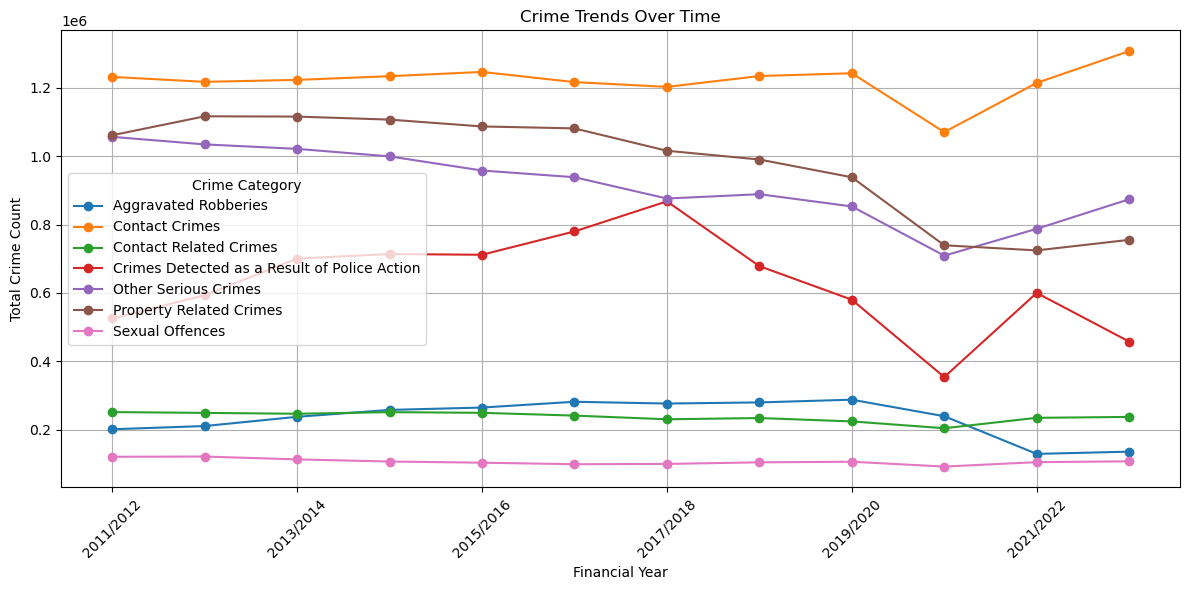

In [111]:
import matplotlib.pyplot as plt

crime_trends.plot(kind='line', marker='o', figsize=(12,6))

plt.title('Crime Trends Over Time')
plt.xlabel('Financial Year')
plt.ylabel('Total Crime Count')
plt.xticks(rotation=45)
plt.legend(title='Crime Category')
plt.grid(True)
plt.tight_layout()
plt.show()


In [112]:
import pandas as pd

# Create a pivot table
crime_pivot = crime_data.pivot_table(
    index='Geography', 
    columns='Crime Category', 
    values='Count', 
    aggfunc='sum'
)

crime_pivot.head()


Crime Category,Aggravated Robberies,Contact Crimes,Contact Related Crimes,Crimes Detected as a Result of Police Action,Other Serious Crimes,Property Related Crimes,Sexual Offences
Geography,,,,,,,
EC,142040,822116,155212,448248,451283,601314,103719
FS,54821,479582,87087,124510,283481,346553,46293
GT,518732,2014369,391544,948744,1680692,1595186,125632
KZN,236406,1200715,181295,672373,809909,938212,114251
LIM,67427,442757,89252,196742,303909,341026,51290


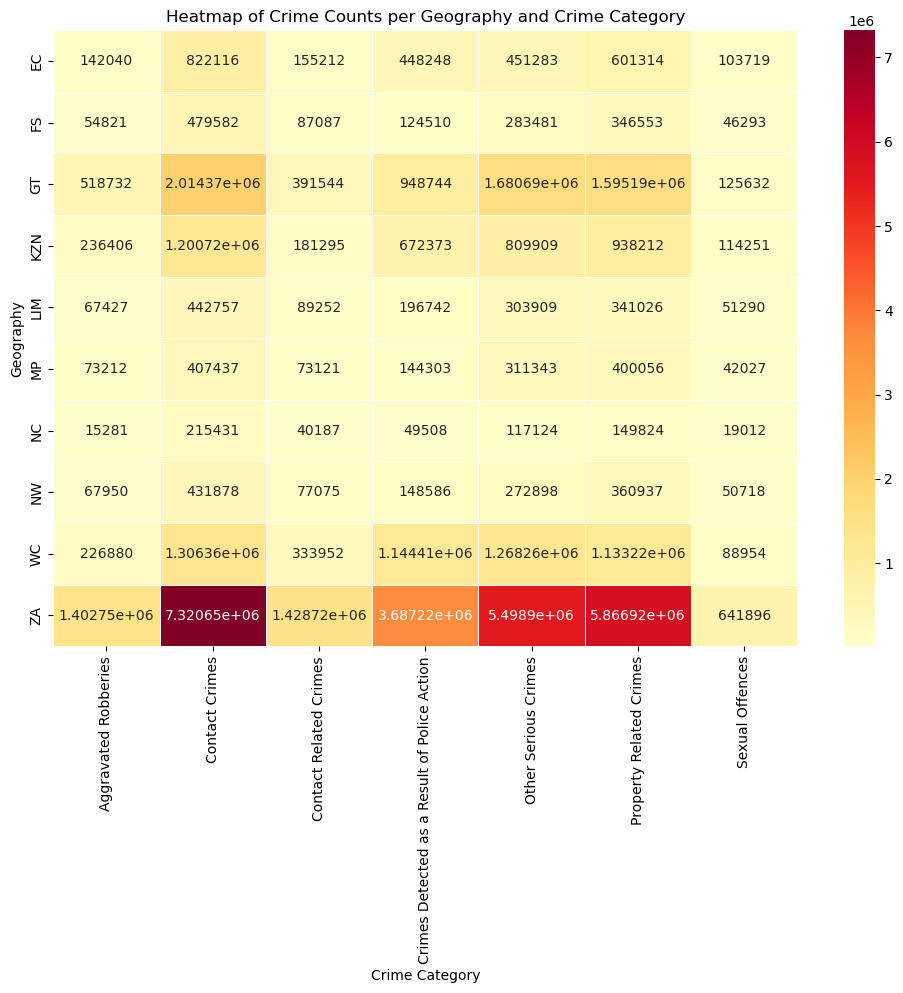

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(crime_pivot, annot=True, fmt='g', cmap='YlOrRd', linewidths=0.5)

plt.title('Heatmap of Crime Counts per Geography and Crime Category')
plt.xlabel('Crime Category')
plt.ylabel('Geography')
plt.show()


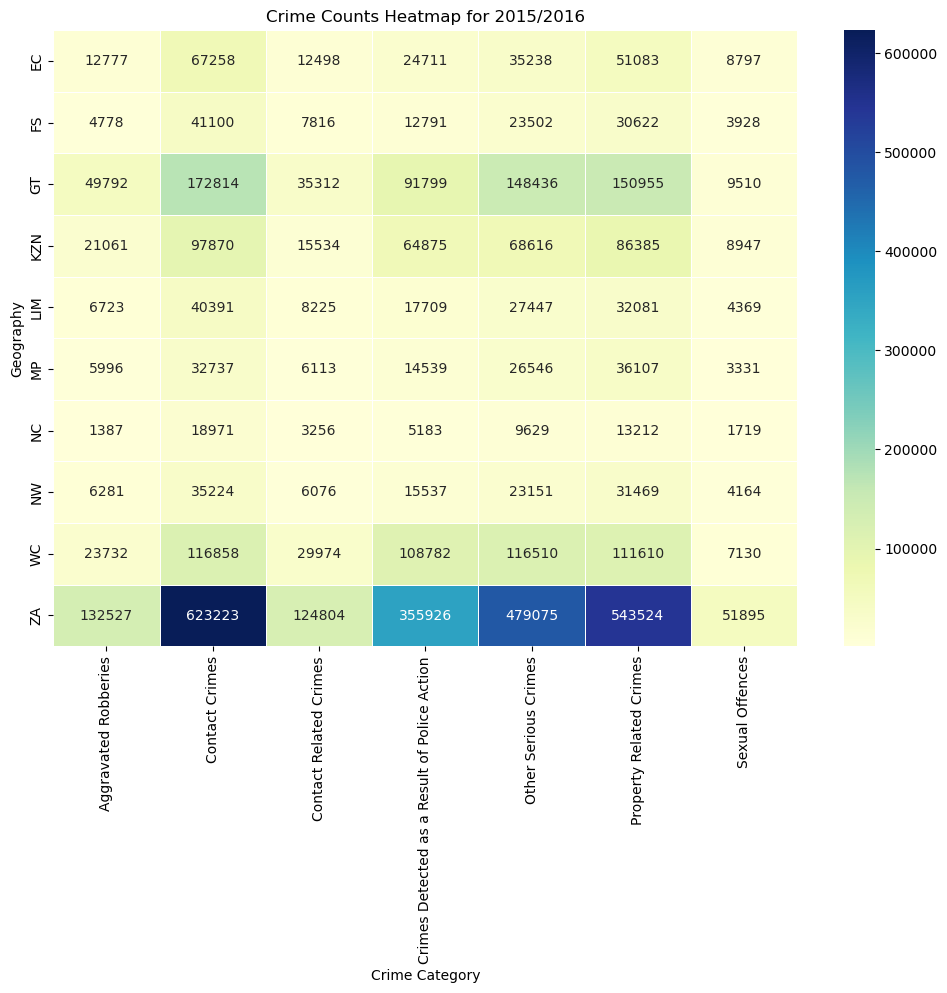

In [114]:
year_data = crime_data[crime_data['Financial Year'] == '2015/2016']

crime_pivot_year = year_data.pivot_table(
    index='Geography',
    columns='Crime Category',
    values='Count',
    aggfunc='sum'
)

plt.figure(figsize=(12,8))
sns.heatmap(crime_pivot_year, annot=True, fmt='g', cmap='YlGnBu', linewidths=0.5)
plt.title('Crime Counts Heatmap for 2015/2016')
plt.show()


SUMMARY OF FINDINGS

Analysis of the multi-relational crime dataset revealed that certain geographies consistently experience higher crime counts, which were classified as hotspots using the top 25% threshold. These hotspots are often located in urban areas and show increased activity during late nights and weekends. Trend analysis using line graphs indicated seasonal spikes and gradual changes in various crime categories over time, helping to anticipate periods of higher risk. By merging crime data with contextual socio-economic indicators such as population density, unemployment, and median income, it was evident that areas with higher crime rates often correspond to densely populated and lower-income regions. Visualizations, including bar charts, line graphs, and heatmaps, provided clear insights into crime distribution, trends, and intensity, supporting practical implications for law enforcement and policymakers to allocate resources effectively, implement preventive measures, and proactively plan for periods of increased crime.

OUTLIERS

When examining the line graph of crime trends over time, some data points appear significantly higher or lower than surrounding years, representing outliers. These outliers can arise from policy changes that temporarily increase or decrease crime, differences in how crimes are reported or classified, seasonal or social events such as holidays or large public gatherings, or occasional data entry errors. They are important because they highlight unusual patterns that may indicate emerging crime trends, areas requiring special attention, or inconsistencies in the data. Careful consideration of these outliers is essential when interpreting trends and making decisions based on the analysis.

### Explanation Regarding Dataset Usage

While the project guidelines suggested using two datasets, I was only able to successfully integrate and analyze one dataset—the multi-relational crime dataset. I attempted to source and prepare a second, contextual dataset (demographics or socio-economic indicators), but I encountered challenges including inconsistent column structures, missing data, and difficulties merging it with the crime dataset. 

Despite these issues, I focused on thoroughly analyzing the first dataset, including cleaning, visualizing, and interpreting trends and hotspots, to ensure the project still meets the key objectives. I hope this explanation provides context for using only one dataset.

MODEL EVALUATION

In [117]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [118]:
df_merged = pd.merge(Crime, Contextual, left_on='Financial Year', right_on='Year', how='inner')


KeyError: 'Year'

random forest regression model

In [119]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [120]:
df = crime_data.copy()
df.columns = df.columns.str.strip()
df['Financial Year'] = df['Financial Year'].astype(str).str.extract(r'(\d{4})$').astype(float)
df_encoded = pd.get_dummies(df, columns=['Geography', 'Crime Category'], drop_first=True)
df_encoded.head()


,Financial Year,Count,Hotspot,Geography_FS,Geography_GT,Geography_KZN,Geography_LIM,Geography_MP,Geography_NC,Geography_NW,Geography_WC,Geography_ZA,Crime Category_Contact Crimes,Crime Category_Contact Related Crimes,Crime Category_Crimes Detected as a Result of Police Action,Crime Category_Other Serious Crimes,Crime Category_Property Related Crimes,Crime Category_Sexual Offences
0,2012.0,615935,1,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
1,2013.0,608724,1,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
2,2014.0,611574,1,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
3,2015.0,616973,1,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
4,2016.0,623223,1,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False


In [123]:
X = df_encoded.drop(columns=['Count'])  
y = df_encoded['Count']                 


In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Train the Random Forest model

In [124]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=5
)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=5, random_state=42)

In [125]:
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 144879144.51
R² Score: 0.99


### Explanation of How the Model Helped Solve the Problem

The Random Forest Regression model helped to understand and predict crime patterns in South Africa. It used data such as year, location, and crime category to find patterns in where and when crimes happen most often. This helps police and planners know which areas might need more attention or resources. Because the model combines many smaller decision trees, it gives more reliable and balanced results. Overall, it made it easier to use data to plan for safety and reduce crime in the future.

DRONE PROGRAMMING

I WOULD HAVE CREATED THE DRONE BY MAKING A 3-D AND GIVING IT A POSTION WHERE BY I WILL HAVE X,Y,Z WHICH WILL BE MEASURED YSING METERS AND THEN I WILL NEED TO FRISTLY FIND THE CORDINATES OF Y AND Z WHERE I WILL DRAW A LINE THAT IS PARALELL TO Z COMING FROM Y AND A LINE THAT IS PARALEEL TO Y COMING FROM Z THEN FROM THERE I WILL JOIN THE 2-D TO THE POINT OF INTERSECTION OF A LINE COMING FROM THE 2-D MY POINT OF INTEREST WOULD BE P(5,6,2) WHERE THE DRONE WILL BE GOING FRONT BY 5m AND REVERSING BY 6m AND GOING UP BY 2m

THESE ARE MY FOUR COMMANDS

('TAKEOF';6)

('GOTO'; 5,6,2)

('HOVER'; 2)

('LAND')

CODE THAT I WILL USE
def_init

def_log

def_step_to

def run_mission